In [1]:
import geopandas as gpd

<Axes: >

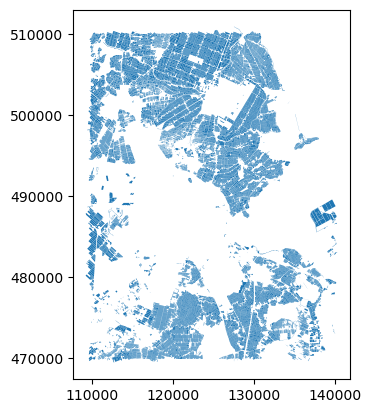

In [2]:
fields1 = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")
fields1.plot()

### Read the geopackage with limited bbox

In [3]:
# Define bounding box
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)

<Axes: >

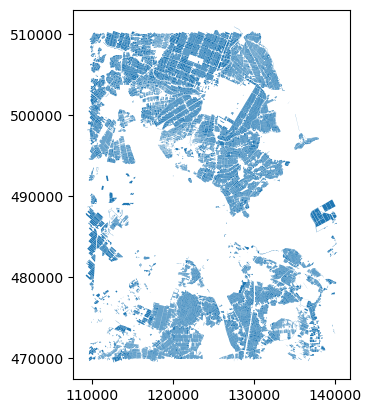

In [4]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)
fields.plot()

In [5]:
fields.type

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [6]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [7]:
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

In [8]:
 # A smaller bounding box in RD
 xmin, xmax = (120_000, 135_000)
 ymin, ymax = (485_000, 500_000)

 fields_cx = fields.cx[xmin:xmax, ymin:ymax]

In [16]:
# fields_cx.to_file('data_export_vector/fields_cropped.shp')
# fields_cx.to_file('data_export_vector/fields.json')
fields_cx.to_file('data_export_vector/fields.geojson')

### Read the exported cropped data

In [18]:
cropped_fields = gpd.read_file('data_export_vector/fields.json')
wells = gpd.read_file('data/brogmwvolledigeset.zip')

<Axes: >

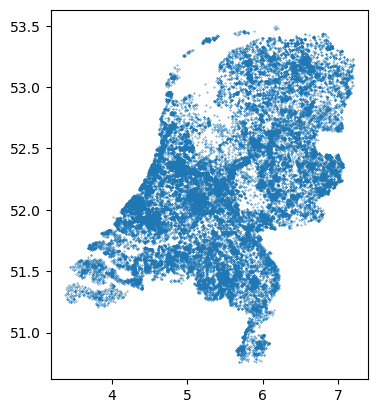

In [19]:
wells.plot(markersize=0.1)

In [21]:
# Project before doing the intersect
wells = wells.to_crs(epsg=28992)

In [22]:
wells_clip = wells.clip(fields)
wells_clip

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
38675,GMW000000045394,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (113790.002 470530.002)
38511,GMW000000045973,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008MV0,POINT (113790.002 470530.002)
40816,GMW000000043465,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (113760.002 470620.002)
19885,GMW000000024473,50200097,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (113860.002 470630.001)
34771,GMW000000039417,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (122095.001 469915.002)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38540,GMW000000045351,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008MV0,POINT (129850.001 508300.002)
39449,GMW000000044814,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008MV0,POINT (129850.001 508300.002)
39396,GMW000000044482,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (129850.001 508300.002)
40336,GMW000000043355,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,POINT (128025.001 508460.002)


<Axes: >

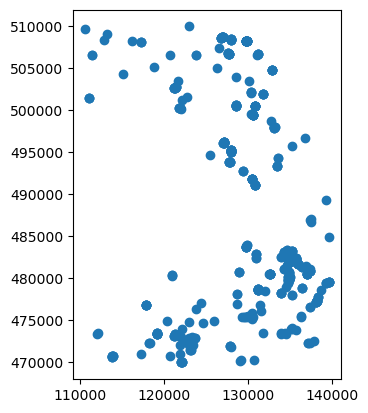

In [23]:
wells_clip.plot()

### Alternate method of clipping

<Axes: >

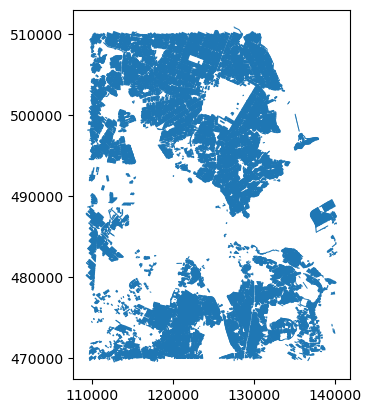

In [24]:
##### Buffer the fields
buffer = fields.buffer(50)
fields_buffer = fields.copy()
fields_buffer['geometry'] = buffer
fields_buffer.plot()

<Axes: >

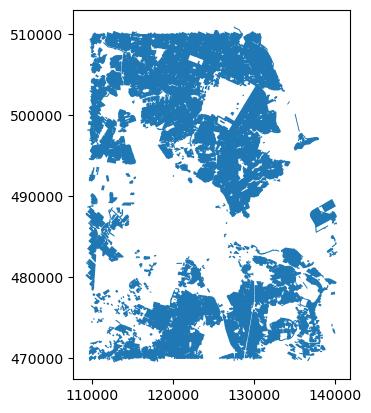

In [26]:
##### Dissolve the buffered polygons - results in simplified geometries for clip
fields_buffer_dissolve = fields_buffer.dissolve()
fields_buffer_dissolve.plot()

<Axes: >

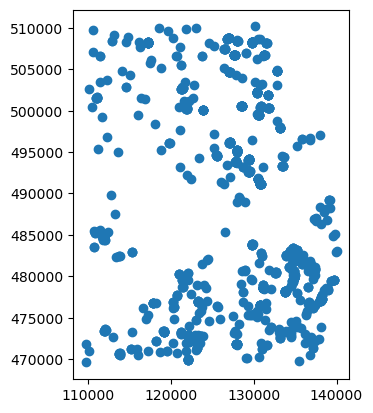

In [27]:
wells_clip_buffer = wells.clip(fields_buffer_dissolve)
wells_clip_buffer.plot()

### Inverse clip (buffer fields w/ original wells)

In [37]:
# Read in data
fields =  gpd.read_file("data_export_vector/fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

In [38]:
# Crop points with bounding box
xmin, ymin, xmax, ymax = fields.total_bounds
wells = wells.to_crs(28992)
wells_cx = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500]

In [39]:
# Create buffer
wells_cx_500mbuffer = wells_cx.copy()
wells_cx_500mbuffer['geometry'] = wells_cx.buffer(500)

<Axes: >

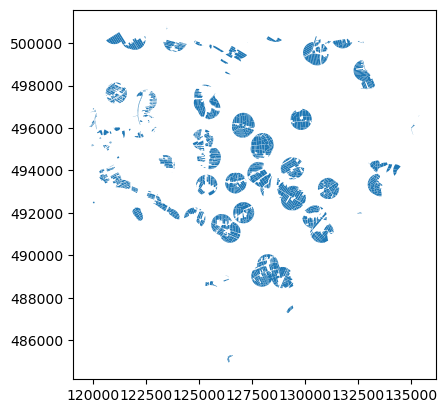

In [40]:
# Clip
fields_clip_buffer = fields.clip(wells_cx_500mbuffer)
fields_clip_buffer.plot()

### Spatially join fields

In [41]:
# Join fields and wells_cx_500mbuffer
fields_wells_buffer = fields.sjoin(wells_cx_500mbuffer)
print(fields_wells_buffer.shape)

(11420, 46)


<Axes: >

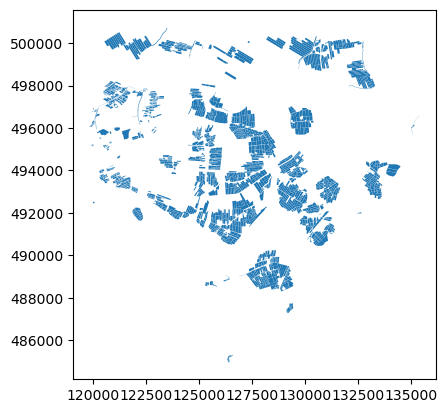

In [43]:
# locate unique indexes to identify duplicates
idx = fields_wells_buffer.index.unique()
fields_in_buffer = fields.iloc[idx]
fields_in_buffer.plot()

In [44]:
fields_in_buffer.head()

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120154.309 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119855.745 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119924.704 49..."
5,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120180.970 495948.210, 120177.562 49..."
14,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119956.123 495139.738, 119945.408 49..."


In [45]:
### Modify geometry of a geodataframe

In [46]:
water = gpd.read_file('data/status_vaarweg.zip')
water

,OBJECTID,VRT_CODE,VRTNAAM,HAVEN_VAAR,MEETPUNT_B,MEETPUNT_E,TRAJECTLEN,STATUS,TOEVOEGING,COR_NAAM,KENMERK_ID,ID,geometry
0,7.0,236,"Zaan, Tap- of Tochtsloot, Markervaart en Alkma...",NaN,0.000,20.700,NaN,AANT,Aantakking,NaN,NaN,16499658.0,"LINESTRING (52.41810 4.84060, 52.42070 4.84090..."
1,8.0,206,Oude Rijn,NaN,35.220,50.729,NaN,VERB,Verbinding,NaN,NaN,16499547.0,"LINESTRING (52.11910 4.67450, 52.11930 4.67340..."
2,9.0,571,Scheepvaartroute Scheveningen,NaN,0.000,3.300,NaN,HR,Hoofdroute,NaN,NaN,16498211.0,"LINESTRING (52.10090 4.25730, 52.10390 4.25530..."
3,10.0,406,"Vaarwater naar Emden, Gaatje Bocht, Oostfriesc...",NaN,38.963,79.108,NaN,AANT,Aantakking,NaN,NaN,16498860.0,"LINESTRING (53.47250 6.84550, 53.47740 6.83840..."
4,11.0,229,Vaarweg vanaf het IJmeer via de Randmeren naar...,NaN,0.177,78.481,NaN,VERB,Verbinding,NaN,NaN,16499212.0,"LINESTRING (52.32270 5.14300, 52.32100 5.14640..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87.0,124c,Beatrixkanaal,NaN,0.000,8.362,NaN,AANT,Aantakking,NaN,NaN,16499919.0,"LINESTRING (51.49270 5.39100, 51.48050 5.39160..."
87,88.0,228,Eem en havens van Amersfoort,NaN,0.000,19.632,NaN,AANT,Aantakking,NaN,NaN,16499988.0,"LINESTRING (52.15900 5.38510, 52.16010 5.38340..."
88,89.0,102m,Breeddiep,NaN,0.000,0.803,NaN,HR,Hoofdroute,NaN,NaN,16500003.0,"LINESTRING (51.97340 4.12420, 51.97110 4.12220..."
89,90.0,270,"Gouwe, Gouwekanaal en voorhaven Julianasluis",NaN,0.000,14.968,NaN,HT,Hoge transporten,NaN,NaN,16500163.0,"LINESTRING (52.11910 4.67450, 52.11850 4.67430..."


In [47]:
water.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

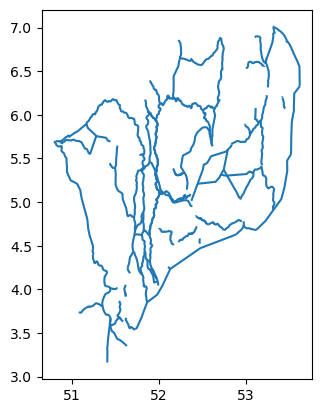

In [48]:
water.plot()

In [49]:
water['geometry']

0     LINESTRING (52.41810 4.84060, 52.42070 4.84090...
1     LINESTRING (52.11910 4.67450, 52.11930 4.67340...
2     LINESTRING (52.10090 4.25730, 52.10390 4.25530...
3     LINESTRING (53.47250 6.84550, 53.47740 6.83840...
4     LINESTRING (52.32270 5.14300, 52.32100 5.14640...
                            ...                        
86    LINESTRING (51.49270 5.39100, 51.48050 5.39160...
87    LINESTRING (52.15900 5.38510, 52.16010 5.38340...
88    LINESTRING (51.97340 4.12420, 51.97110 4.12220...
89    LINESTRING (52.11910 4.67450, 52.11850 4.67430...
90    LINESTRING (51.88940 4.61900, 51.89040 4.61350...
Name: geometry, Length: 91, dtype: geometry

In [50]:
print(water['geometry'][2], type(water['geometry'][2]))

LINESTRING (52.100900002 4.25730000099998, 52.1039 4.25529999999998, 52.111299999 4.24929999900002, 52.1274 4.23449999799999) <class 'shapely.geometry.linestring.LineString'>


### Use SHAPELY library to transform/manipulate geometries

In [52]:
import shapely

# Define a function flipping the x and y coordinate values
def flip(geometry):
    return shapely.ops.transform(lambda x, y: (y, x), geometry)

# Apply this function to all coordinates and all lines
geom_corrected = water['geometry'].apply(flip)

<Axes: >

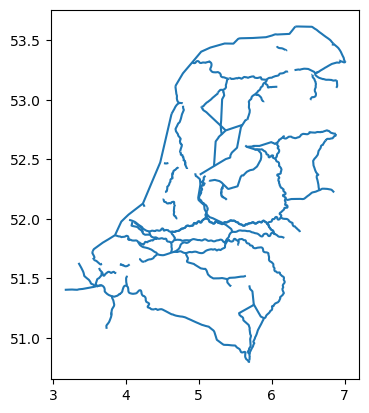

In [53]:
# Update geometry
flipped_water = water.copy()
flipped_water['geometry'] = geom_corrected

# Visualization
flipped_water.plot()

In [54]:
flipped_water.to_file('data_export_vector/flipped_water.json')